**Instructions**:

1. Go to the *Cell* menu and click *Run All*

#### Code setup

In [22]:
from collections import Counter, defaultdict, deque
import itertools
import numpy as np
import matplotlib.pyplot as plt
import string
import textwrap

from IPython.display import clear_output, display
import ipywidgets as widgets

In [23]:
plt.rcParams['figure.figsize'] = (18, 12)

In [24]:
ct = 'UPKBXHTZAZXMEIWEMCUPQIXAULQTMVGJYBXYGPDDKSPTPNIHKFLPGRFVAGRDVZMCHTCDCHLOIVYAMVQLEWTAGJQPZSQIEGHIRFDBXGURETLQCEFPOSCUGUYSTVLIDSAKFPGCVYCGLOUZECBTKTYCMRKJYSOOPKYVXCHJWBFSVIGRVWRYCGLWUKFTDSADYCTUGDCCMBGTCHLOTPRDNGGKFTFGGTSGXZAVYRARKJRXGQVGYXKCHTMBFIPZAPMWPXNPKHKVQBNGVZBTTZNPQWTFGRBXYTGICCMYGPYCWDGIFPIGHFPTTQJTGEASTKCMMSZTFPGUGUYHPSNCRWXBWDZTKCHBCNLFGHSXKSFZLRKSCJCHTGVYCHJICICDYHJVLJFPGIMUGSVNMGDAGDZTKGYYGRAJGIWFNWEBJNKSSLGGXGEFKEESZBCNFOPRETFSPKQRASOVQIHYGVNIASORJAVCPJGHMSPKYCWGGTPTMKJZRUBSNUBXYTKVYCWACIRXGVGCJBTBCLRWHFUFDIASHZPHMDWSJXLVGUNPISTFLENPNZAZXMEIWEMCIIYEAMKEYVKCWEBQKSCBGCZDCGCGPVKKDXXZFUGUYWGRLSFOTKGCASNCKPGDTFNDLSFKFTGCVZMCHTRLZABQMVWPEGQDMGXUGECGTZNPAPEZGUYHRAOVRGBQMVWRKMRKMVKORYWXGKJZAWMKQUGUYSTVLIUIVDYIASORRXVONCWGXZCKCSDSAJYGXIUVBPIIDCGRDSARLSTDTZTPMSMVWPIIDCGRDSAJWHMSOZQHHQQEQIKIEKCSMVCKAPEQWCYIBCPFDDGSMVWIASRIGKTHGBCNBGEFKENHCKGDGONCWXGTGRQXUZGWPDFHJVMIASTKFTIIDCGRDSAVTTGHJFSVAHJVWPKSPVATLGCIGARFGCYIXRKEQIXOFSMIAYGPQPKSIVLTKOVVBHXQTVRAROURLXGHGIPTEOVVBETWTKFTAWUKMGBOPUYKBRMRFCWSUTPXUSFGSQEWEBCNVFAGRDZFCGFNTGVYCBHGVICKHZWKGDGOTPLTPQQEATIHKERWXTKVJSLWPTCEHZARJEAODVRXVGWSQIBHWKGDGSOVPVXRKERWXFGEYXLGCEATBBRLZABQMVWRKMRKMHRGVVKHMVGGSQEWEBCNFOASCUKSGCWSBGVIGQNHGUUWBZGZRHIOKICSIFKMYIXYGPKJLHTVKPBBUVAGXHKEYENPNZAZXMGEAGRDVZMCLMUKCBMVGGSQEWEBCNBGWJCSYCTVLRKMRKGDGKJZJTMVGGPXOOVVMGLSEICIDSAZQJLSFWMGWSEIWEMWQEUWBZGUGUYWGRLSASNCKPGQQLJSGCVWGCWGWTFPLMUKCBMVGPQWHKGURWTHRLZABQMVWRKMRKMVKORYWLTGKEBTXRRFQHBPNVZNIFGJCCMWPXRWXRKWDXXVGCJBTBMVWTQQJRLVXDTFRDVCNRQDEIVZMCMVCKGHGCYNGSXZALQTWWPJCRNFGTMBFIPZAPMWQEQIHONCMLMKQGYGMWGJRDLSEICIEMCXPTXCPRQWTFGUCCVFAGRXHBMVWIASZJRPGRCIBSXTKECHMVGDMHMQQDKDGZALQTWTQIKPMTQINJUZKTITRQGIRXYWERRTLRKWDXXOPUFTEZORLHIIDCGRTHKFLHIOTBCSPWFVQEKSCUYRTRGDGRXTHFPILWPWGCWWPXYEKOEKGRTZRLZABQMVWTGQTPNIBCPJWHMSOKFXLFCTCLTGHZLPEZANMCBBDPPDGONUPXOSUKYSBGJRKXKOPUJTGOFCCBTBYYMHXGQCSIBCPYYHLWPTCQXQQDCZGCYEYHMVGIQPTZIFPXMVOKFTWWHWGTASNCKPGOPUPHTONXMGBHJDQXGOFUGIBCPKMQXWPXRWXTKIQIIIDCGREMMEMLGSZRKEESUFDWBUJHSPEWVPNJUZKTITRONXMGBHJDQWTJGSCTGOOFLVMVGDMHMKKUCARIUVBDMVGIYHRAOVRGBQMVWPEUQIGIAAUZLREIFVRWXQTRKTKGJFSEVFAGRDLMUKCBXZIRKPESPTPNIHKFLPGRXRPXHIUVJABDVZARNFXVRTVVPZOJXGCUMRNAGERENPNZQWXRKEZNMVGXMKXFPDCCMQQDKJGWERRXHBUYCPWEWRPIXFUXAWJODIGIBGJZLIXZNZETGQGFPVTBKQYIBCPICKXONVBIAOVTPNIHQXPPIVGIQPMUEYOWTRCERXVWRRRTWGGMCGTZCTYSXAKTBTOSNFNBXBVJPTICTKCSEMCIMJGRLRKTLVGCJXLVCUADGQGZTTWHJVNGBBEZNAXGQWYHRAOVRGBQMVWRKMRKMVKORYWXGQNZDUHFFTMRDGKETTGHGUYHHZWKGDGHJRRKXFAJGBBZCIGCWSUZECKOVZMCTZGKMGLOCEBXGACCADEALNGAEWCDQDGWUTJPBAGURDAOXVBTOSNFNTWHJVBXYTKVFTEZORLZXMGOAWTBIVGCMVKJCMTARCCIASOVQHTUGZQDGZAJGVGSFRLSGCVVLRKMRKCSTZKTCHBUPJYBXGURETPWVYFTKDTZTPMSMVWQHPERLKXFKWWIAOVRJXVSUVLIMVGDCHLOIVYCWHJRRIASOVQHTUGYYHGCVSCTGAQUGUBSFGSQEWEBCNVFAGRDZFCGFNBGCCQDNGGUDDKWOGJTFSPKGCZRKXGITZUZECTHWICHVVGDCHTRKXGITZUZECTHWICXLFGDGCBGEVLIHTCEMGWWPRPNLWIEYINFGKFTRPQKFWTJGKFTVVCIYRMSTZQIBQQWZTBBIVYHRTQIYJLSTKMEKCFLATUIVUGUYWELJIYCTRLNHBGVJHXHQWMGZSFZEXMONJGVGOVLPTLQCEYALCDVNTKACECCMZAKGTWHQKFTVCPKCCMCHKFTFSUJYVXPGZLVLWIECSMVGPAPGBQKRWXBDVKDOSFWPDFCPVBDVIOVLIMCCEMIASTWMGTBARRIXARKUXEZDVBTMSEKYQESKEBXZWVRJHBUPRRJKSUTFTFSUKFTKSCICIPCCCEDKWVYKHHBGWMGLWIEGCZWPNFXVVCJCRKSVBCNBGWJCSMCRIMRXGUKFTFSUJYVXCTRFPLVQWRWXAGJQPZSQIZDMVCEBDGSHFPKXFKWGRTHKFLXGKJZAWMVGDYIVVKEEENPNZAZXMKJSHXRYZRWMVGDCHLOIVRDVVGTIIASXRJXWWVPMUMVGJGVGOVLPTKGCRLSWGCRPTMKQFDIASOFQIICRLJPKRKXGITZUZECTHWICHVVGDCHWWIZRPEGKXLPMITVQPKSEVLIKONKMIASQGCGTHKFLDYDWSJXVYGPGCYFCJRGNQVLPTLOPUKPGMPVRLHFMJCRNFKKWHVVGDCHXUUJJIEGORLNODPJCIVDWSJXVYGPYAZCTZRWFGCICBHGVFDIXBDRQTWCPKFTVCOGSITHKFLPEQQDNAXLKKWDYVCIBEKCDCCBLCHKCCYFQDLJFPGIRWXCTPDDKSZRKEESVYCWTFFECHLCHIQPBGTVJPMSFKMIASKERTZSTWYRMCTZXPMWQENGHPNVKLAWNVBXYTKVFTEZORLPGRFJYPKSTVJPMSFKMIASFZQRKSVVJDZOTZRWFDTFZAXAVYCHXQWIGIRCHVJABDVZARNFXVAGRDVFEGTDJPGHUOUVBDGBWDZTKHJVMGXHKTNGHPNVKHBBXFJKBBIVJABDVZARNFXVQQXQCLQTHTVYCSBTHZAJEHAFDIASWEBTKZAZLVIFQSJTFGOFQIIIDCGRDSARJVHFKKFBLWPMMAOSQGCGTHKFLHLIEYYHFCFLJPKAWCRXIZKTYIBCPRLSXLRFLTGHKRRXHBYYGRAOTVKJVVOFPTVCOGSITHKFLPEZAVVEXBUZTTMVCERWXHGTFCBEWVQJLSFZLBHGVSJDVYEZNWXFUVQEXQKRJARKKKFIRDKTYADSAJGOXGCJYGXGWCRENPNZAZXMEIWEMCUPQIXAURPTVCODMCEMJPZGBREIWEMCUPQIXAUZLLAWEYYUTGVYGVAEWRJXMMUPKBXHTZAZXMGEAGRDVZMCTZIFPXMVOZQJLSFWMGMVGDCHLOIVGILSNWUWBZGKFTKSNVTPGHUPKBXHTZAZXMKJQTGHYZRWMVGDCHLOIVZJMSPTPNIHGUSHBBIRNJUZKTITRONXMGBHJDQXFWNRPARVASPXWGKXLPMITVQRASOVQPKSQWRTGIUVBXGKJZAWTQTPNIHUTRNWBQJRQWYIPTRXHBKJADFDWKCSTBFFLARHJVPTLINKGCZVCJFXLRKXGITZNPQXZBGU'

In [25]:
alphabet = string.ascii_uppercase

In [26]:
def build_maps():
    encrypt_map = {}
    decrypt_map = {}
    rotated = deque(alphabet)
    for key_char in alphabet:
        encrypt_map[key_char] = dict(zip(alphabet, rotated))
        decrypt_map[key_char] = dict(zip(rotated, alphabet))
        rotated.rotate(-1)
    return encrypt_map, decrypt_map

In [27]:
encrypt_map, decrypt_map = build_maps()

In [28]:
def vigenere(text, key, mapping):
    res = []
    key_it = itertools.cycle(key)
    for tc in text:
        if tc in alphabet:
            res.append(mapping[next(key_it)][tc])
        else:
            res.append(tc)

    return ''.join(res)

In [29]:
def letter_counts_by_key_position(ct, key_length):
    counters = [defaultdict(int) for _ in range(key_length)]
    counters_iter = itertools.cycle(counters)

    for c in ct:
        if c.upper() in alphabet:
            next(counters_iter)[c.upper()] += 1

    return [[ctr[c] for c in alphabet] for ctr in counters]


In [30]:
def letter_frequencies_by_key_position(ct, key_length):
    freqs = letter_counts_by_key_position(ct, key_length)
    return [[x/sum(ctr) for x in ctr] for ctr in freqs]

In [31]:
def circular_bar_plot(labels, heights,
                      bottom=1, max_height=4,
                      clockwise=True, title=None, color='blue',
                      ax=None, letter_fontsize=14, number_fontsize=12,
                      title_fontsize=18):
    assert len(heights) == len(labels)
    N = len(labels)

    if ax is None:
        ax = plt.subplot(111, polar=True)
    
    if clockwise:
        raw_thetas = np.linspace(1/2 * np.pi, -3/2 * np.pi, N, endpoint=False)
    else:
        raw_thetas = np.linspace(1/2 * np.pi, 5/2 * np.pi, N, endpoint=False)

    # Matplotlib requires the θ-coords to be in the range [0, 2π)
    thetas = np.mod(raw_thetas, 2*np.pi)

    height_scaler = np.vectorize(lambda h: max_height * h / max(heights))
    scaled_heights = height_scaler(heights)
    yticks_raw = np.arange(0, max(heights), 0.05)
    yticks = height_scaler(yticks_raw) + bottom
    yticklabels = [f'{h*100:.0f}%' for h in yticks_raw]

    bars = ax.bar(thetas, scaled_heights, width=2*np.pi / N, bottom=bottom,
                  color=color)

    ax.set_xticks(thetas)
    ax.set_xticklabels(labels, fontsize=letter_fontsize)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels, fontsize=number_fontsize)

    if title:
        ax.set_title(title, fontsize=title_fontsize, pad=1.5*title_fontsize)

In [32]:
# from: https://en.wikipedia.org/wiki/Letter_frequency#Relative_frequencies_of_the_first_letters_of_a_word_in_the_English_language
letter_frequency_raw = '''0.08167
0.01492
0.02782
0.04253
0.12702
0.02228
0.02015
0.06094
0.06966
0.00153
0.00772
0.04025
0.02406
0.06749
0.07507
0.01929
0.00095
0.05987
0.06327
0.09056
0.02758
0.00978
0.02360
0.00150
0.01974
0.00074'''

In [33]:
average_frequencies = [float(x) for x in letter_frequency_raw.splitlines()]

In [34]:
def plot_frequencies_per_key_position(key_length, text, max_grid_columns=4,
                                      text_desc='Ciphertext',
                                      colors=('#070', '#707',)):
    grid_rows_lower = -(-key_length // max_grid_columns) # Trick to make // "round up"
    grid_rows = grid_rows_lower + 1
    grid_columns = -(-key_length // grid_rows_lower)

    average_axes = plt.subplot(grid_rows, grid_columns, 1, polar=True)
    kp_axes = [plt.subplot(grid_rows, grid_columns, grid_columns+i+1, polar=True)
               for i in range(key_length)]
    kp_letter_frequencies = letter_frequencies_by_key_position(text, key_length)

    font_kwargs = dict(letter_fontsize=9, number_fontsize=8, title_fontsize=10)

    circular_bar_plot(alphabet, average_frequencies, ax=average_axes,
                    title='Average English', color=colors[0], **font_kwargs)
    
    for k, kp_freq in enumerate(kp_letter_frequencies):
        circular_bar_plot(alphabet, kp_freq, ax=kp_axes[k],
                        title=f'{text_desc} (letters {k+1}, {k+1+key_length}...)',
                        color=colors[1], **font_kwargs)
    clear_output(wait=True)
    plt.tight_layout(w_pad=1, h_pad=2)
    plt.show()

In [35]:
def try_key_size():
    slider = widgets.IntSlider(value=2, min=1, max=15, step=1,
                            description='Key length', continuous_update=False)
    out = widgets.Output()
    box = widgets.VBox([slider, out])

    def update_fn(_):
        with out:
            plot_frequencies_per_key_position(slider.value, ct)
    slider.observe(update_fn, names='value')

    update_fn(None)
    display(box)
    return slider

In [36]:
def try_decryption(slider):
    state = {'key_pickers': []}
    vbox = widgets.VBox()

    def reset():
        if len(state['key_pickers']) != slider.value:
            state['key_pickers'] = [widgets.Dropdown(options=[*alphabet],
                                            layout={'width': '60px'})
                                for _ in range(slider.value)]
            hbox = widgets.HBox(state['key_pickers'])
            vbox.children = [hbox, button, text_out, graphs_out]

    button = widgets.Button(description='Check decryption result',
                            layout=widgets.Layout(min_width='200px'))

    text_out = widgets.Output()
    graphs_out = widgets.Output()

    def decrypt():
        key = ''.join(kp.value for kp in state['key_pickers'])
        pt = vigenere(ct, key, decrypt_map)

        text_out.clear_output()
        with text_out:
            for ln in textwrap.wrap(pt[:360], 100):
                print(ln)
            print('......')

        with graphs_out:
            plot_frequencies_per_key_position(slider.value, pt, text_desc='Decrypted')

    reset()
    decrypt()
    button.on_click(lambda _: decrypt())
    slider.observe(lambda _: reset())
    display(vbox)

#### What are the letter frequencies in the ciphertext?

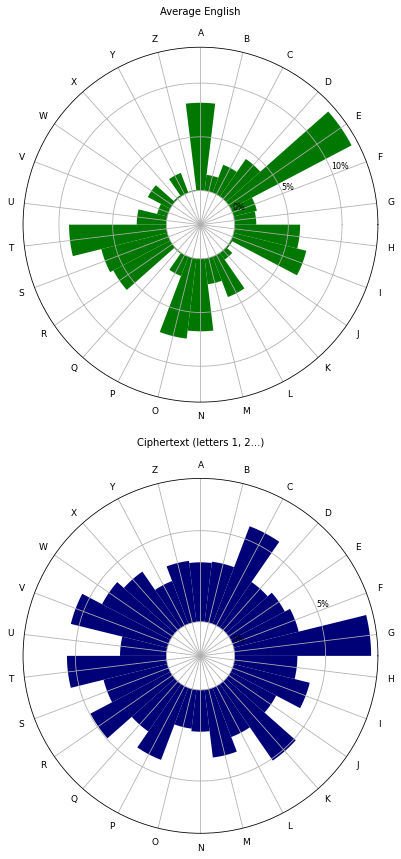

In [37]:
plot_frequencies_per_key_position(1, ct, colors=('#070', '#007',))

#### Can we get a clue as to the key size?

In [38]:
slider = try_key_size()

#### Can we work out the key?

In [39]:
try_decryption(slider)